In [2]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.compose import ColumnTransformer

C:\Users\91876\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
#import .csv file
df = pd.read_csv("C:\\Users\\91876\\Pictures\\Camera Roll\\british lib\\Time Series\\Digital analytics\\1. FB_data_targeting.csv",sep=",")


# 1. Data Exploration & Cleaning

In [5]:
df.head()

,Campaign name,Ad set name,Ad name,Result Type,Results,CTR (all),Result rate,Amount spent (INR),Cost per result,Frequency,"CPM (cost per 1,000 impressions)",Impressions,Clicks (all),Reporting starts,Reporting ends
0,CV - Franchise Lead Generation - Phase II - 3 Nov,Remarketing,Image-Partner with us today!,On-Facebook leads,60.0,1.432111,0.148662,3655.22,60.920333,3.202158,90.565411,40360,578,2019-11-01,2019-12-03
1,CV - Franchise Lead Generation - Phase II - 3 Nov,IT Professionals,Image-Minimum Investment & Maximum Profit,On-Facebook leads,69.0,1.992568,0.201890,3794.37,54.990870,2.749115,111.021155,34177,681,2019-11-01,2019-12-03
2,CV - Franchise Lead Generation - Phase II - 3 Nov,Remarketing,Image-Minimum Investment & Maximum Profit,On-Facebook leads,76.0,2.828769,0.285886,3181.32,41.859474,2.522201,119.670478,26584,752,2019-11-01,2019-12-03
3,CV - Franchise Lead Generation - Phase II - 3 Nov,Business Owners,Image-Minimum Investment & Maximum Profit,On-Facebook leads,43.0,1.912535,0.174605,2918.14,67.863721,2.206720,118.493523,24627,471,2019-11-01,2019-12-03
4,CV - Franchise Lead Generation - Phase II - 3 Nov,Remarketing,Image-Minimum Investment & Maximum Profit,On-Facebook leads,55.0,2.868151,0.261606,2275.41,41.371091,2.666667,108.229167,21024,603,2019-11-01,2019-12-03


In [6]:
df.shape

(31, 15)

In [41]:
df.isnull().sum()

Campaign name                       0
Ad set name                         0
Ad name                             0
Result Type                         0
Results                             4
CTR (all)                           0
Result rate                         4
Amount spent (INR)                  0
Cost per result                     4
Frequency                           0
CPM (cost per 1,000 impressions)    0
Impressions                         0
Clicks (all)                        0
Reporting starts                    0
Reporting ends                      0
dtype: int64

# Deal with Null Values

In [42]:
#Fill all blanks in Results with 0
df['Results'] = df['Results'].fillna(0)
df['Result rate'] = df['Result rate'].fillna(0)

In [43]:
#let's look if any column has null values
df.isnull().sum()

Campaign name                       0
Ad set name                         0
Ad name                             0
Result Type                         0
Results                             0
CTR (all)                           0
Result rate                         0
Amount spent (INR)                  0
Cost per result                     4
Frequency                           0
CPM (cost per 1,000 impressions)    0
Impressions                         0
Clicks (all)                        0
Reporting starts                    0
Reporting ends                      0
dtype: int64

# 2. Feature Engineering

In [44]:
df["CPC"] = df['Amount spent (INR)']/ df['Clicks (all)']

In [45]:
df.head()

,Campaign name,Ad set name,Ad name,Result Type,Results,CTR (all),Result rate,Amount spent (INR),Cost per result,Frequency,"CPM (cost per 1,000 impressions)",Impressions,Clicks (all),Reporting starts,Reporting ends,CPC
0,CV - Franchise Lead Generation - Phase II - 3 Nov,Remarketing,Image-Partner with us today!,On-Facebook leads,60.0,1.432111,0.148662,3655.22,60.920333,3.202158,90.565411,40360,578,2019-11-01,2019-12-03,6.323910
1,CV - Franchise Lead Generation - Phase II - 3 Nov,IT Professionals,Image-Minimum Investment & Maximum Profit,On-Facebook leads,69.0,1.992568,0.201890,3794.37,54.990870,2.749115,111.021155,34177,681,2019-11-01,2019-12-03,5.571762
2,CV - Franchise Lead Generation - Phase II - 3 Nov,Remarketing,Image-Minimum Investment & Maximum Profit,On-Facebook leads,76.0,2.828769,0.285886,3181.32,41.859474,2.522201,119.670478,26584,752,2019-11-01,2019-12-03,4.230479
3,CV - Franchise Lead Generation - Phase II - 3 Nov,Business Owners,Image-Minimum Investment & Maximum Profit,On-Facebook leads,43.0,1.912535,0.174605,2918.14,67.863721,2.206720,118.493523,24627,471,2019-11-01,2019-12-03,6.195626
4,CV - Franchise Lead Generation - Phase II - 3 Nov,Remarketing,Image-Minimum Investment & Maximum Profit,On-Facebook leads,55.0,2.868151,0.261606,2275.41,41.371091,2.666667,108.229167,21024,603,2019-11-01,2019-12-03,3.773483


In [46]:
df.corr()

,Results,CTR (all),Result rate,Amount spent (INR),Cost per result,Frequency,"CPM (cost per 1,000 impressions)",Impressions,Clicks (all),CPC
Results,1.000000,0.367864,0.180461,0.953427,-0.360770,0.837796,-0.376265,0.928367,0.944730,-0.506035
CTR (all),0.367864,1.000000,0.604073,0.299206,-0.568363,0.431590,0.006821,0.242584,0.498351,-0.717287
Result rate,0.180461,0.604073,1.000000,0.086970,-0.605192,0.135434,0.368425,0.035547,0.109203,-0.263764
Amount spent (INR),0.953427,0.299206,0.086970,1.000000,-0.251566,0.881236,-0.426272,0.978567,0.933510,-0.466222
Cost per result,-0.360770,-0.568363,-0.605192,-0.251566,1.000000,-0.275468,-0.150831,-0.237117,-0.304622,0.752566
Frequency,0.837796,0.431590,0.135434,0.881236,-0.275468,1.000000,-0.452890,0.900803,0.903893,-0.562751
"CPM (cost per 1,000 impressions)",-0.376265,0.006821,0.368425,-0.426272,-0.150831,-0.452890,1.000000,-0.511689,-0.430252,0.332718
Impressions,0.928367,0.242584,0.035547,0.978567,-0.237117,0.900803,-0.511689,1.000000,0.911120,-0.473294
Clicks (all),0.944730,0.498351,0.109203,0.933510,-0.304622,0.903893,-0.430252,0.911120,1.000000,-0.603440
CPC,-0.506035,-0.717287,-0.263764,-0.466222,0.752566,-0.562751,0.332718,-0.473294,-0.603440,1.000000


# We can divide Frequency in buckets

In [47]:
df['Frequency'] = df['Frequency'].apply(lambda x:'1 to 2' if x<2
                                               else '2 to 3' if x>=2 and x<3 
                                               else '3 to 4' if x>=3 and x<4
                                               else '4 to 5' if x>=4 and x<5
                                               else 'More than 5')

In [48]:
df.head()

,Campaign name,Ad set name,Ad name,Result Type,Results,CTR (all),Result rate,Amount spent (INR),Cost per result,Frequency,"CPM (cost per 1,000 impressions)",Impressions,Clicks (all),Reporting starts,Reporting ends,CPC
0,CV - Franchise Lead Generation - Phase II - 3 Nov,Remarketing,Image-Partner with us today!,On-Facebook leads,60.0,1.432111,0.148662,3655.22,60.920333,3 to 4,90.565411,40360,578,2019-11-01,2019-12-03,6.323910
1,CV - Franchise Lead Generation - Phase II - 3 Nov,IT Professionals,Image-Minimum Investment & Maximum Profit,On-Facebook leads,69.0,1.992568,0.201890,3794.37,54.990870,2 to 3,111.021155,34177,681,2019-11-01,2019-12-03,5.571762
2,CV - Franchise Lead Generation - Phase II - 3 Nov,Remarketing,Image-Minimum Investment & Maximum Profit,On-Facebook leads,76.0,2.828769,0.285886,3181.32,41.859474,2 to 3,119.670478,26584,752,2019-11-01,2019-12-03,4.230479
3,CV - Franchise Lead Generation - Phase II - 3 Nov,Business Owners,Image-Minimum Investment & Maximum Profit,On-Facebook leads,43.0,1.912535,0.174605,2918.14,67.863721,2 to 3,118.493523,24627,471,2019-11-01,2019-12-03,6.195626
4,CV - Franchise Lead Generation - Phase II - 3 Nov,Remarketing,Image-Minimum Investment & Maximum Profit,On-Facebook leads,55.0,2.868151,0.261606,2275.41,41.371091,2 to 3,108.229167,21024,603,2019-11-01,2019-12-03,3.773483


In [49]:
df['Ad_name'] = df['Ad name']

In [50]:
df[['Ad Format','Ad Headline']] = df.Ad_name.str.split("-",expand=True)

In [51]:
df.head()

,Campaign name,Ad set name,Ad name,Result Type,Results,CTR (all),Result rate,Amount spent (INR),Cost per result,Frequency,"CPM (cost per 1,000 impressions)",Impressions,Clicks (all),Reporting starts,Reporting ends,CPC,Ad_name,Ad Format,Ad Headline
0,CV - Franchise Lead Generation - Phase II - 3 Nov,Remarketing,Image-Partner with us today!,On-Facebook leads,60.0,1.432111,0.148662,3655.22,60.920333,3 to 4,90.565411,40360,578,2019-11-01,2019-12-03,6.323910,Image-Partner with us today!,Image,Partner with us today!
1,CV - Franchise Lead Generation - Phase II - 3 Nov,IT Professionals,Image-Minimum Investment & Maximum Profit,On-Facebook leads,69.0,1.992568,0.201890,3794.37,54.990870,2 to 3,111.021155,34177,681,2019-11-01,2019-12-03,5.571762,Image-Minimum Investment & Maximum Profit,Image,Minimum Investment & Maximum Profit
2,CV - Franchise Lead Generation - Phase II - 3 Nov,Remarketing,Image-Minimum Investment & Maximum Profit,On-Facebook leads,76.0,2.828769,0.285886,3181.32,41.859474,2 to 3,119.670478,26584,752,2019-11-01,2019-12-03,4.230479,Image-Minimum Investment & Maximum Profit,Image,Minimum Investment & Maximum Profit
3,CV - Franchise Lead Generation - Phase II - 3 Nov,Business Owners,Image-Minimum Investment & Maximum Profit,On-Facebook leads,43.0,1.912535,0.174605,2918.14,67.863721,2 to 3,118.493523,24627,471,2019-11-01,2019-12-03,6.195626,Image-Minimum Investment & Maximum Profit,Image,Minimum Investment & Maximum Profit
4,CV - Franchise Lead Generation - Phase II - 3 Nov,Remarketing,Image-Minimum Investment & Maximum Profit,On-Facebook leads,55.0,2.868151,0.261606,2275.41,41.371091,2 to 3,108.229167,21024,603,2019-11-01,2019-12-03,3.773483,Image-Minimum Investment & Maximum Profit,Image,Minimum Investment & Maximum Profit


# Split Ad name into Ad Format and Ad Headline

In [52]:
df.drop(['Ad name','Ad_name'],axis=1, inplace = True)

In [53]:
df.head()

,Campaign name,Ad set name,Result Type,Results,CTR (all),Result rate,Amount spent (INR),Cost per result,Frequency,"CPM (cost per 1,000 impressions)",Impressions,Clicks (all),Reporting starts,Reporting ends,CPC,Ad Format,Ad Headline
0,CV - Franchise Lead Generation - Phase II - 3 Nov,Remarketing,On-Facebook leads,60.0,1.432111,0.148662,3655.22,60.920333,3 to 4,90.565411,40360,578,2019-11-01,2019-12-03,6.323910,Image,Partner with us today!
1,CV - Franchise Lead Generation - Phase II - 3 Nov,IT Professionals,On-Facebook leads,69.0,1.992568,0.201890,3794.37,54.990870,2 to 3,111.021155,34177,681,2019-11-01,2019-12-03,5.571762,Image,Minimum Investment & Maximum Profit
2,CV - Franchise Lead Generation - Phase II - 3 Nov,Remarketing,On-Facebook leads,76.0,2.828769,0.285886,3181.32,41.859474,2 to 3,119.670478,26584,752,2019-11-01,2019-12-03,4.230479,Image,Minimum Investment & Maximum Profit
3,CV - Franchise Lead Generation - Phase II - 3 Nov,Business Owners,On-Facebook leads,43.0,1.912535,0.174605,2918.14,67.863721,2 to 3,118.493523,24627,471,2019-11-01,2019-12-03,6.195626,Image,Minimum Investment & Maximum Profit
4,CV - Franchise Lead Generation - Phase II - 3 Nov,Remarketing,On-Facebook leads,55.0,2.868151,0.261606,2275.41,41.371091,2 to 3,108.229167,21024,603,2019-11-01,2019-12-03,3.773483,Image,Minimum Investment & Maximum Profit


In [54]:
df.to_csv('4. Clean_Data_Targeting.csv')

In [55]:
df['Ad set name'].value_counts()

Remarketing         16
Business Owners      5
Housewives           5
IT Professionals     5
Name: Ad set name, dtype: int64

Relationship Visualization

# Effect of Targeting + Ad Headline + Budget on Engagement & Conversion

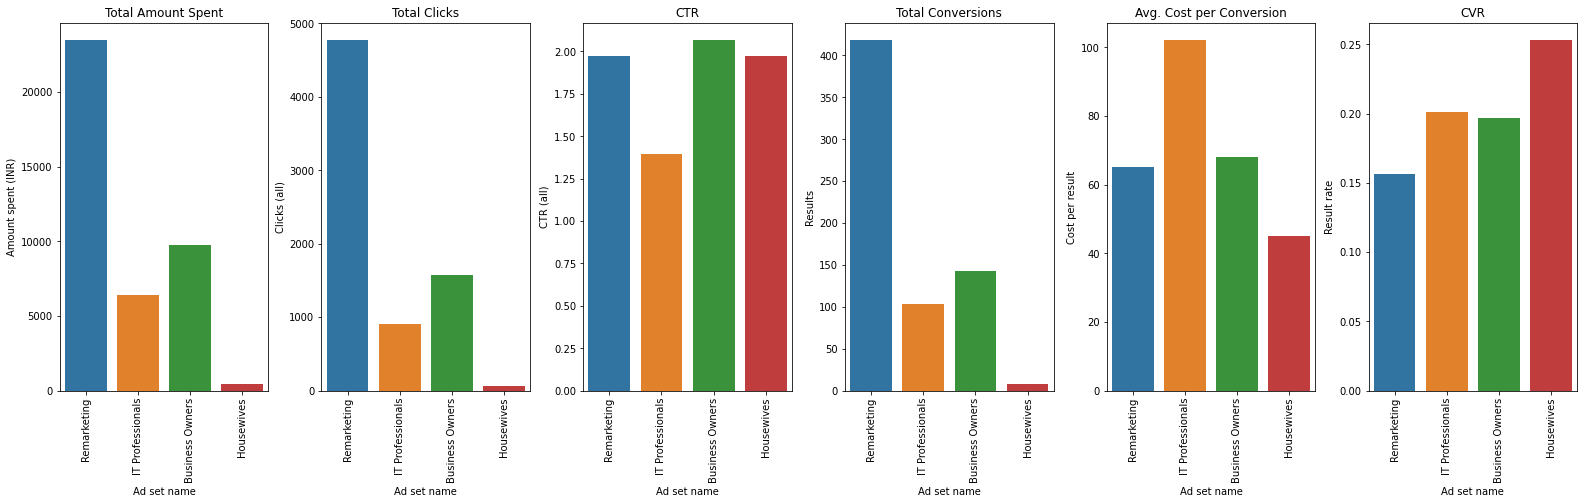

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(22, 7))
# increase figure size 

# subplot 1
plt.subplot(1, 6, 1)
sns.barplot(x='Ad set name', y='Amount spent (INR)', data=df, estimator=np.sum,ci=None)
plt.title("Total Amount Spent")
plt.xticks(rotation=90)


# subplot 2
plt.subplot(1, 6, 2)
sns.barplot(x='Ad set name', y='Clicks (all)', data=df, estimator=np.sum,ci=None)
plt.title("Total Clicks")
plt.xticks(rotation=90)

# subplot 3
plt.subplot(1, 6, 3)
sns.barplot(x='Ad set name', y='CTR (all)', data=df, estimator=np.mean,ci=None)
plt.title("CTR")
plt.xticks(rotation=90)

# subplot 4
plt.subplot(1, 6, 4)
sns.barplot(x='Ad set name', y='Results', data=df, estimator=np.sum,ci=None)
plt.title("Total Conversions")
plt.xticks(rotation=90)

# subplot 5
plt.subplot(1, 6, 5)

sns.barplot(x='Ad set name', y='Cost per result', data=df, estimator=np.mean,ci=None)
plt.title("Avg. Cost per Conversion")
plt.xticks(rotation=90)

# subplot 6
plt.subplot(1,6, 6)
sns.barplot(x='Ad set name', y='Result rate', data=df, estimator=np.mean,ci=None)
plt.title("CVR")
plt.xticks(rotation=90)


plt.tight_layout(pad=0.7)
plt.show()

# Closer look - Amout spent + Clicks + Results

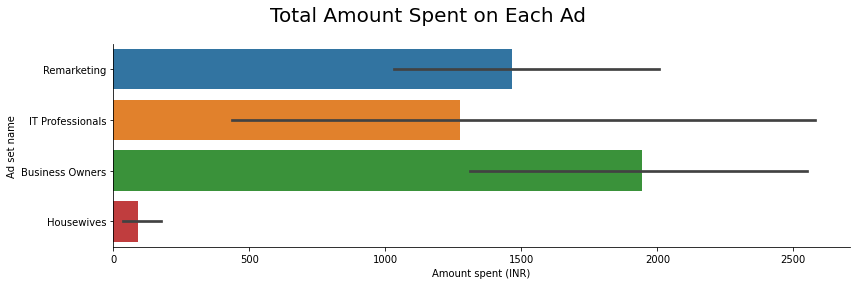

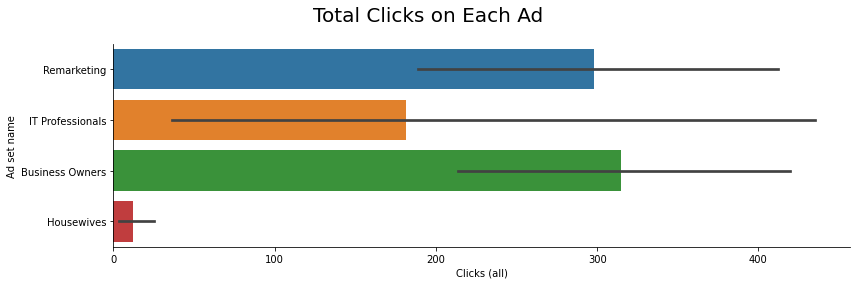

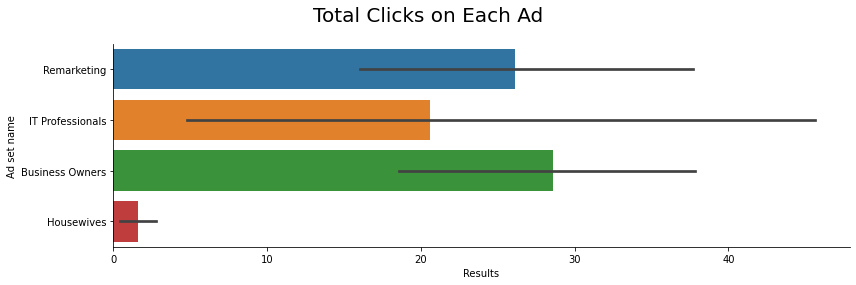

In [57]:

g = sns.catplot(y='Ad set name', x='Amount spent (INR)',
                data=df, kind="bar",
                height=4, aspect=3);
plt.suptitle('Total Amount Spent on Each Ad',fontsize=20)
plt.subplots_adjust(top=0.85)


g = sns.catplot(y='Ad set name', x='Clicks (all)',
                data=df, kind="bar",
                height=4, aspect=3);
plt.suptitle('Total Clicks on Each Ad',fontsize=20)
plt.subplots_adjust(top=0.85)
g = sns.catplot(y='Ad set name', x='Results',
                data=df, kind="bar",
                height=4, aspect=3);
plt.suptitle('Total Clicks on Each Ad',fontsize=20)
plt.subplots_adjust(top=0.85)

# Effect of Targeting + Ad Format + Budget on Engagement & Conversion

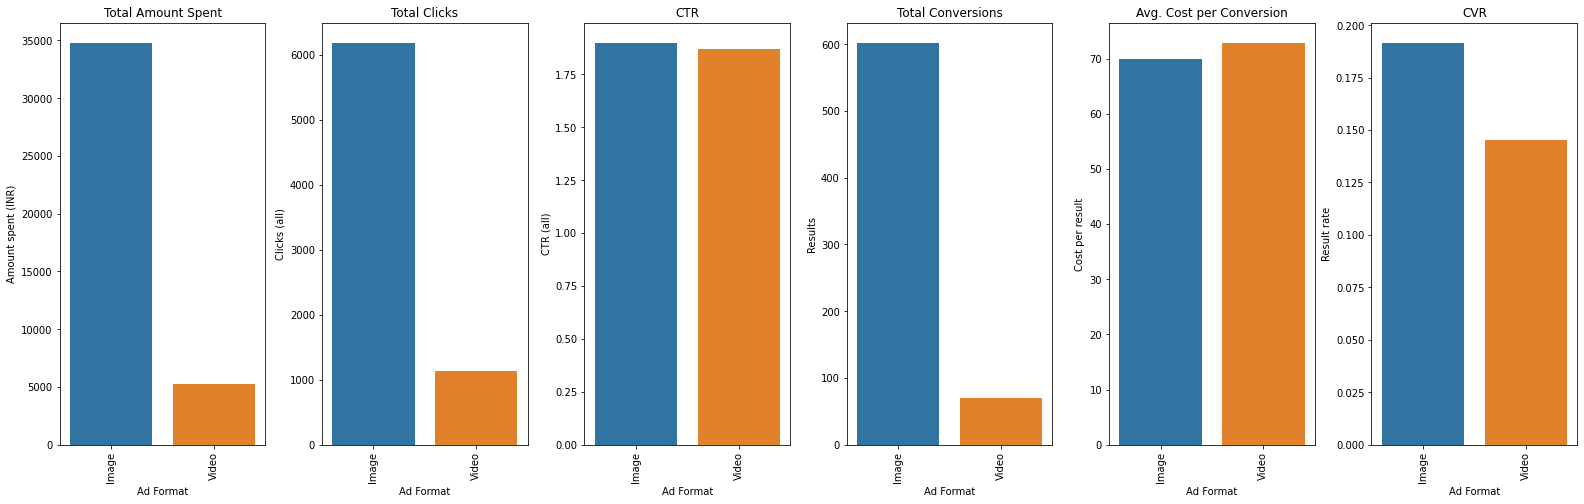

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(22, 7))
# increase figure size 

# subplot 1
plt.subplot(1, 6, 1)
sns.barplot(x='Ad Format', y='Amount spent (INR)', data=df, estimator=np.sum,ci=None)
plt.title("Total Amount Spent")
plt.xticks(rotation=90)


# subplot 2
plt.subplot(1, 6, 2)
sns.barplot(x='Ad Format', y='Clicks (all)', data=df, estimator=np.sum,ci=None)
plt.title("Total Clicks")
plt.xticks(rotation=90)

# subplot 3
plt.subplot(1, 6, 3)
sns.barplot(x='Ad Format', y='CTR (all)', data=df, estimator=np.mean,ci=None)
plt.title("CTR")
plt.xticks(rotation=90)

# subplot 4
plt.subplot(1, 6, 4)
sns.barplot(x='Ad Format', y='Results', data=df, estimator=np.sum,ci=None)
plt.title("Total Conversions")
plt.xticks(rotation=90)

# subplot 5
plt.subplot(1, 6, 5)

sns.barplot(x='Ad Format', y='Cost per result', data=df, estimator=np.mean,ci=None)
plt.title("Avg. Cost per Conversion")
plt.xticks(rotation=90)

# subplot 6
plt.subplot(1,6, 6)
sns.barplot(x='Ad Format', y='Result rate', data=df, estimator=np.mean,ci=None)
plt.title("CVR")
plt.xticks(rotation=90)


plt.tight_layout(pad=0.7)
plt.show()